## Autor: Aaron Frias Romero

# Análisis predictivo del precio de la vivienda

En este proyecto vamos a realizar un modelo predictivo basado en los modelos de regresión para calcular el precio de una vivienda.

El precio de esta vivienda se vera afectada por las distintas variables del dataset, elegiremos el modelo que mejor se adapte a nuestros datos.

Analizaremos distintos escenarios hipóteticos para poder comparar el escenario más optimo.

# FASE 1: Importación del dataset


In [84]:
# Importamos las librerias que utilizaremos
import numpy as np # algebra lineal
import pandas as pd # procesamiento de datos
import matplotlib.pyplot as plp
import seaborn as sns

In [85]:
# Importamos el fichero desde local
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [86]:
# Creamos variable con el dataset
import io
data = pd.read_csv(io.BytesIO(uploaded['data.csv']))

# FASE 2: Análisis exploratorio de los datos

In [87]:
# Comprobamos que el dataset ha sido correctamente importado
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [88]:
# Nombre de las columnas
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [89]:
# Comprobamos el número de filas y columnas
data.shape

(4600, 18)

In [90]:
# Consultamos tipo de variables
data.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

Podemos observar que nos encontramos con cuatro variables de tipo objeto.

Vamos a analizar las distintas categorias dentro de estas variables objeto.

In [91]:
# consultamos categorias dentro de las variables de tipo objeto.
variables_objeto = ['street','city','statezip','country']
data[variables_objeto].value_counts()

street                 city           statezip  country
2520 Mulberry Walk NE  Issaquah       WA 98029  USA        4
2500 Mulberry Walk NE  Issaquah       WA 98029  USA        3
820 NW 95th St         Seattle        WA 98117  USA        2
7490 85th Ave SE       Mercer Island  WA 98040  USA        2
13420 121st Ave NE     Kirkland       WA 98034  USA        2
                                                          ..
18820 129th Pl SE      Renton         WA 98058  USA        1
18820 1st Ave NW       Shoreline      WA 98177  USA        1
18823 SE 216th St      Renton         WA 98058  USA        1
18827 SE 244th Pl      Covington      WA 98042  USA        1
Valley View Trail      Redmond        WA 98052  USA        1
Length: 4526, dtype: int64

Para obtener mejor información sobre cada una de ellas, las analizaremos individualmente.

In [92]:
data["statezip"].value_counts()

WA 98103    148
WA 98052    135
WA 98117    132
WA 98115    130
WA 98006    110
           ... 
WA 98047      6
WA 98288      3
WA 98050      2
WA 98354      2
WA 98068      1
Name: statezip, Length: 77, dtype: int64

Podemos observar que tenemos 77 codigos postales distintos dentro del dataset.

Con algunos de ellos con un máximo de 148 viviendas y un mínimo de 1.

In [93]:
data["city"].value_counts()

Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Issaquah                187
Kirkland                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             148
Shoreline               123
Woodinville             115
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               71
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Bothell                  33
Newcastle                33
SeaTac                   29
Tukwila                  29
Vashon                   29
Enumclaw                 28
Carnation                22
Normandy Park            18
Clyde Hill               11
Medina                   11
Fall City                11
Black Diamond             9
Ravensdale                7
Pacific             

En la variable ciudad podemos observar que la ciudad con mayor número de viviendas en el dataset es Seattle con diferencia.

Esto implica que es un dataset donde la ciudad de Seattle tiene mucha importancia dentro de la poblacioón total del dataset.

In [94]:
data["country"].value_counts()

USA    4600
Name: country, dtype: int64

Todas las viviendas del dataset se encuentran en Estados Unidos.

In [95]:
data["street"].value_counts()

2520 Mulberry Walk NE     4
2500 Mulberry Walk NE     3
9413 34th Ave SW          2
6008 8th Ave NE           2
11034 NE 26th Pl          2
                         ..
1404 Broadmoor Dr E       1
3249 E Ames Lake Dr NE    1
6032 35th Ave NE          1
1006 NE Ravenna Blvd      1
18717 SE 258th St         1
Name: street, Length: 4525, dtype: int64

Podemos observar que no tenemos una calle con una población de datos mucho superior al resto.

In [96]:
# Comprobamos datos estadísticos generales
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.988473,563834.702547,0.0,322875.00,460943.461539,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.000000,4.00,9.0
bathrooms,4600.0,2.160815,0.783781,0.0,1.75,2.250000,2.50,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.000000,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.000000,11001.25,1074218.0
floors,4600.0,1.512065,0.538288,1.0,1.00,1.500000,2.00,3.5
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.000000,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.000000,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.000000,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.000000,2300.00,9410.0


In [97]:
# Comprobamos si tenemos valores nulos
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

#####  Analizamos cada variable de manera individual



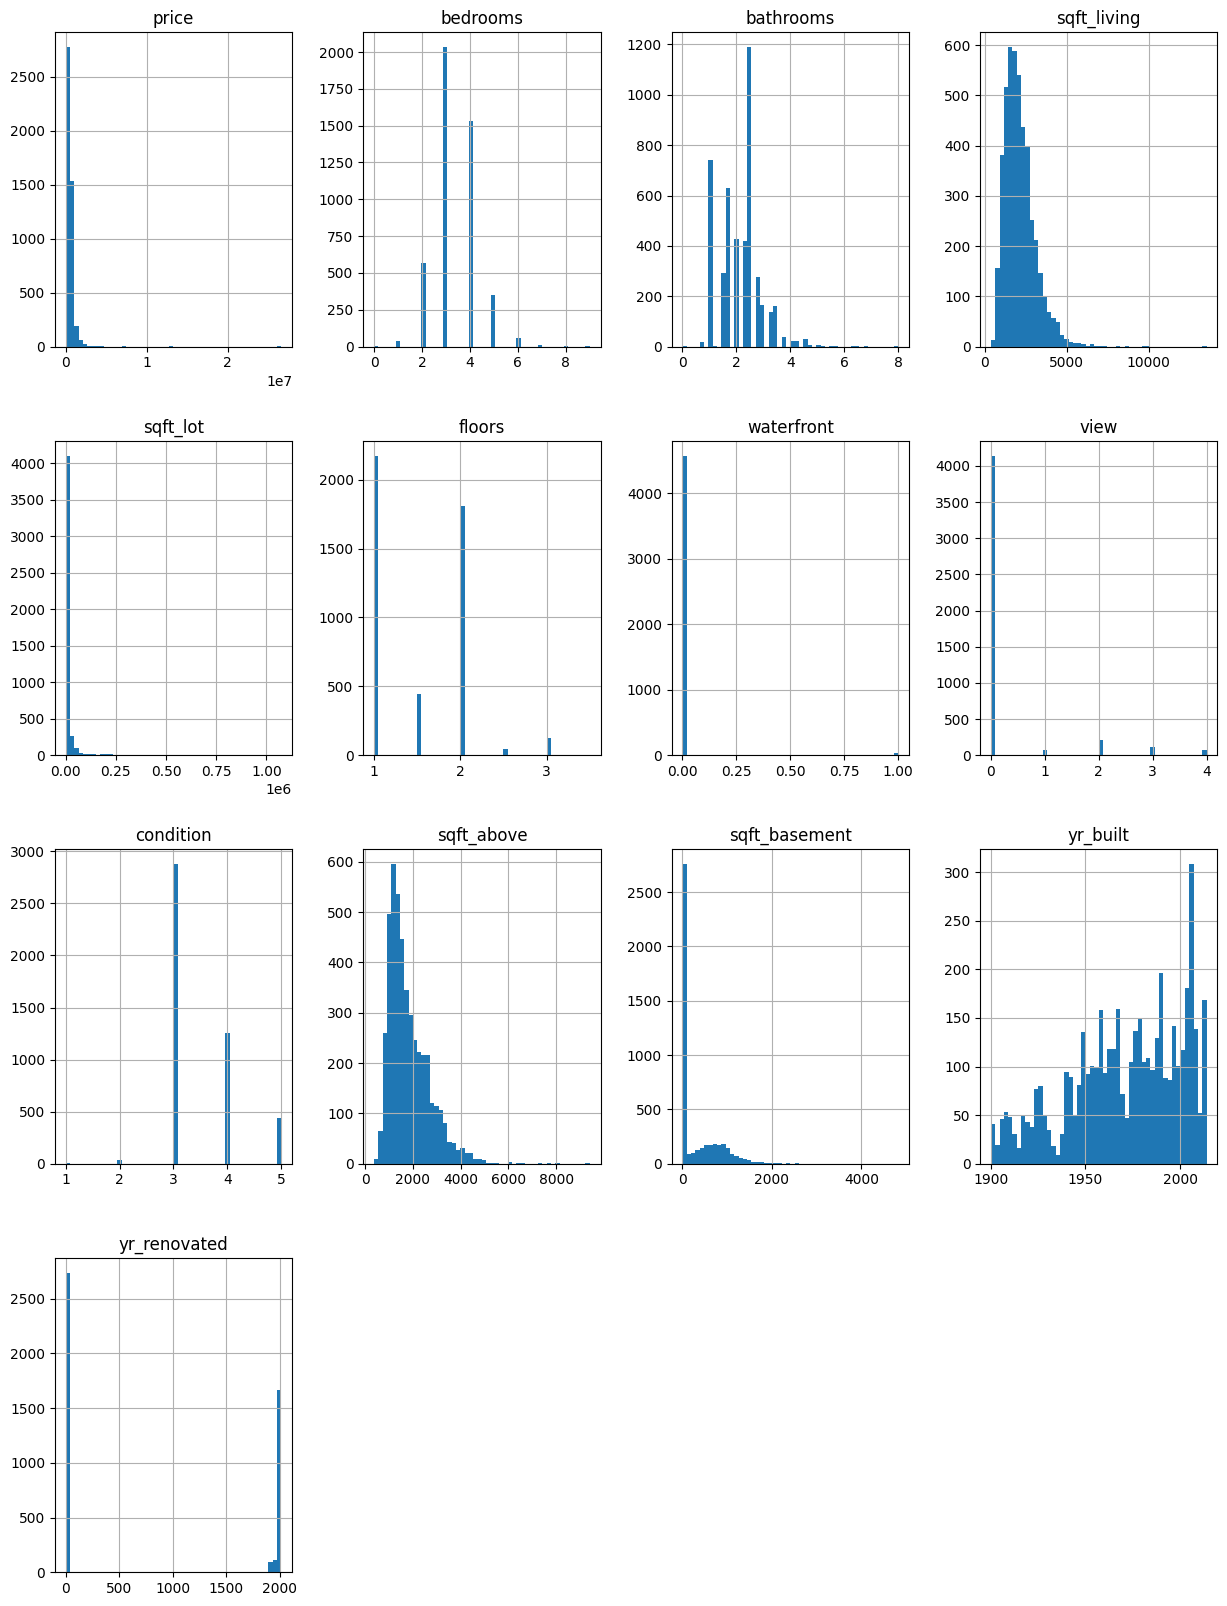

In [98]:
 # Visualizacion histogramas
data.hist(bins=50, figsize=(15,20))
plp.show()

<ipython-input-99-8f713e3d10f0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


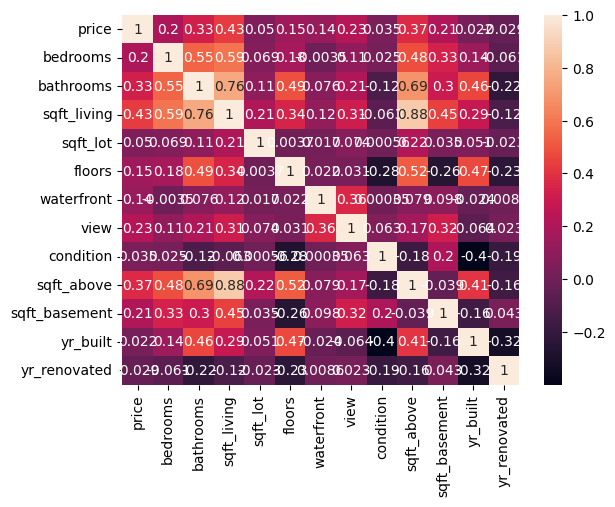

In [99]:
# Correlacion entre variables
corr = data.corr()
sns.heatmap(corr, annot= True);

## Tratamiento de Outliers

In [100]:
# Hacemos una copia del dataset para mantener el original
house_data1 = data.copy()

house_data1

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [101]:
# Identificamos variables numericas y variables categoricas
num_var=data.select_dtypes(include=np.number).columns.to_list()
cat_var=data.select_dtypes(include=object).columns.to_list()

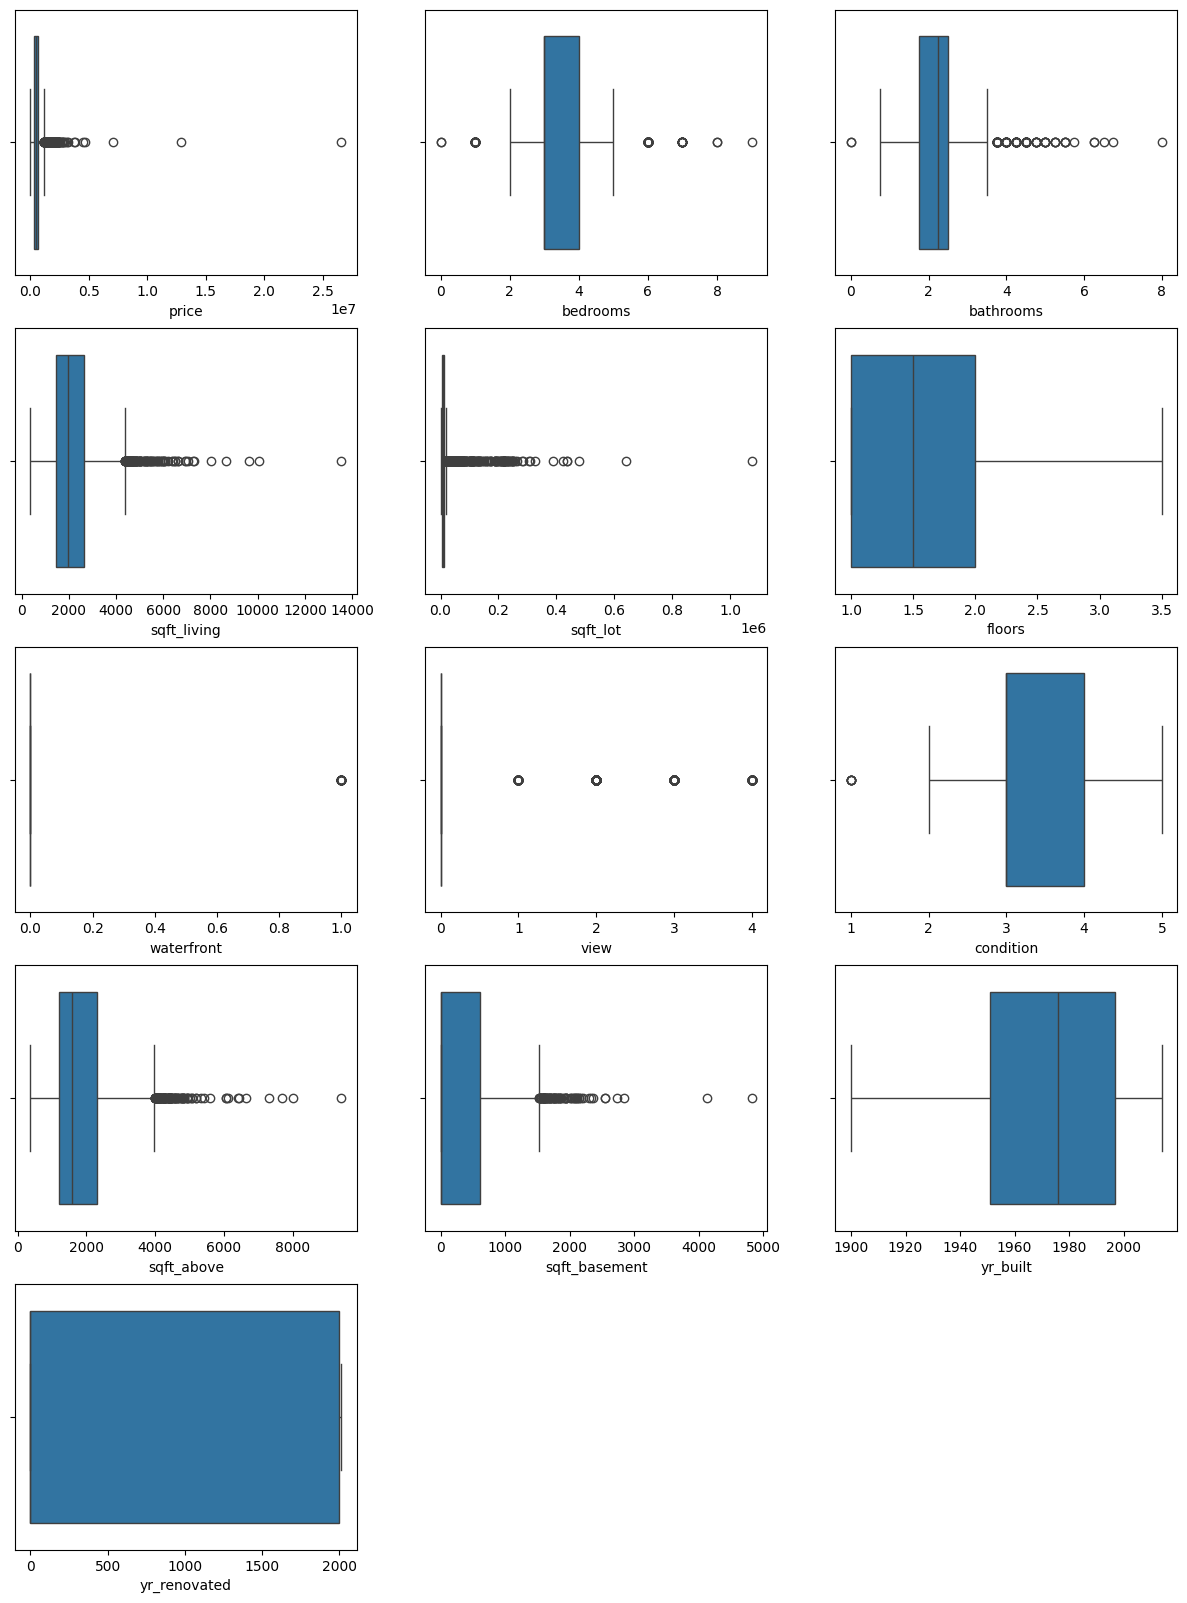

In [102]:
# Analizamos la distribucion de cada variable
i=1
plp.figure(figsize=(15,20))
for j in num_var:
    plp.subplot(5,3,i)
    sns.boxplot(data=house_data1,x=j)
    i+=1

Al ver la distribución de las variables cuantitativas, vemos que para muchas de ellas, se presentan valores muy distantes de la mayoría de los valores que toma esa variable. Estos valores distantes, llamados outlier, los vamos a eliminar

In [103]:
# Eliminamos outlier
def outlier_tret(x):
    upper=x.quantile(0.98)
    lower=x.quantile(0.2)
    x=np.where(x>upper,upper,x)
    x=np.where(x<lower,lower,x)
    return x

In [104]:
house_data1[num_var]=house_data1[num_var].apply(lambda x: outlier_tret(x))

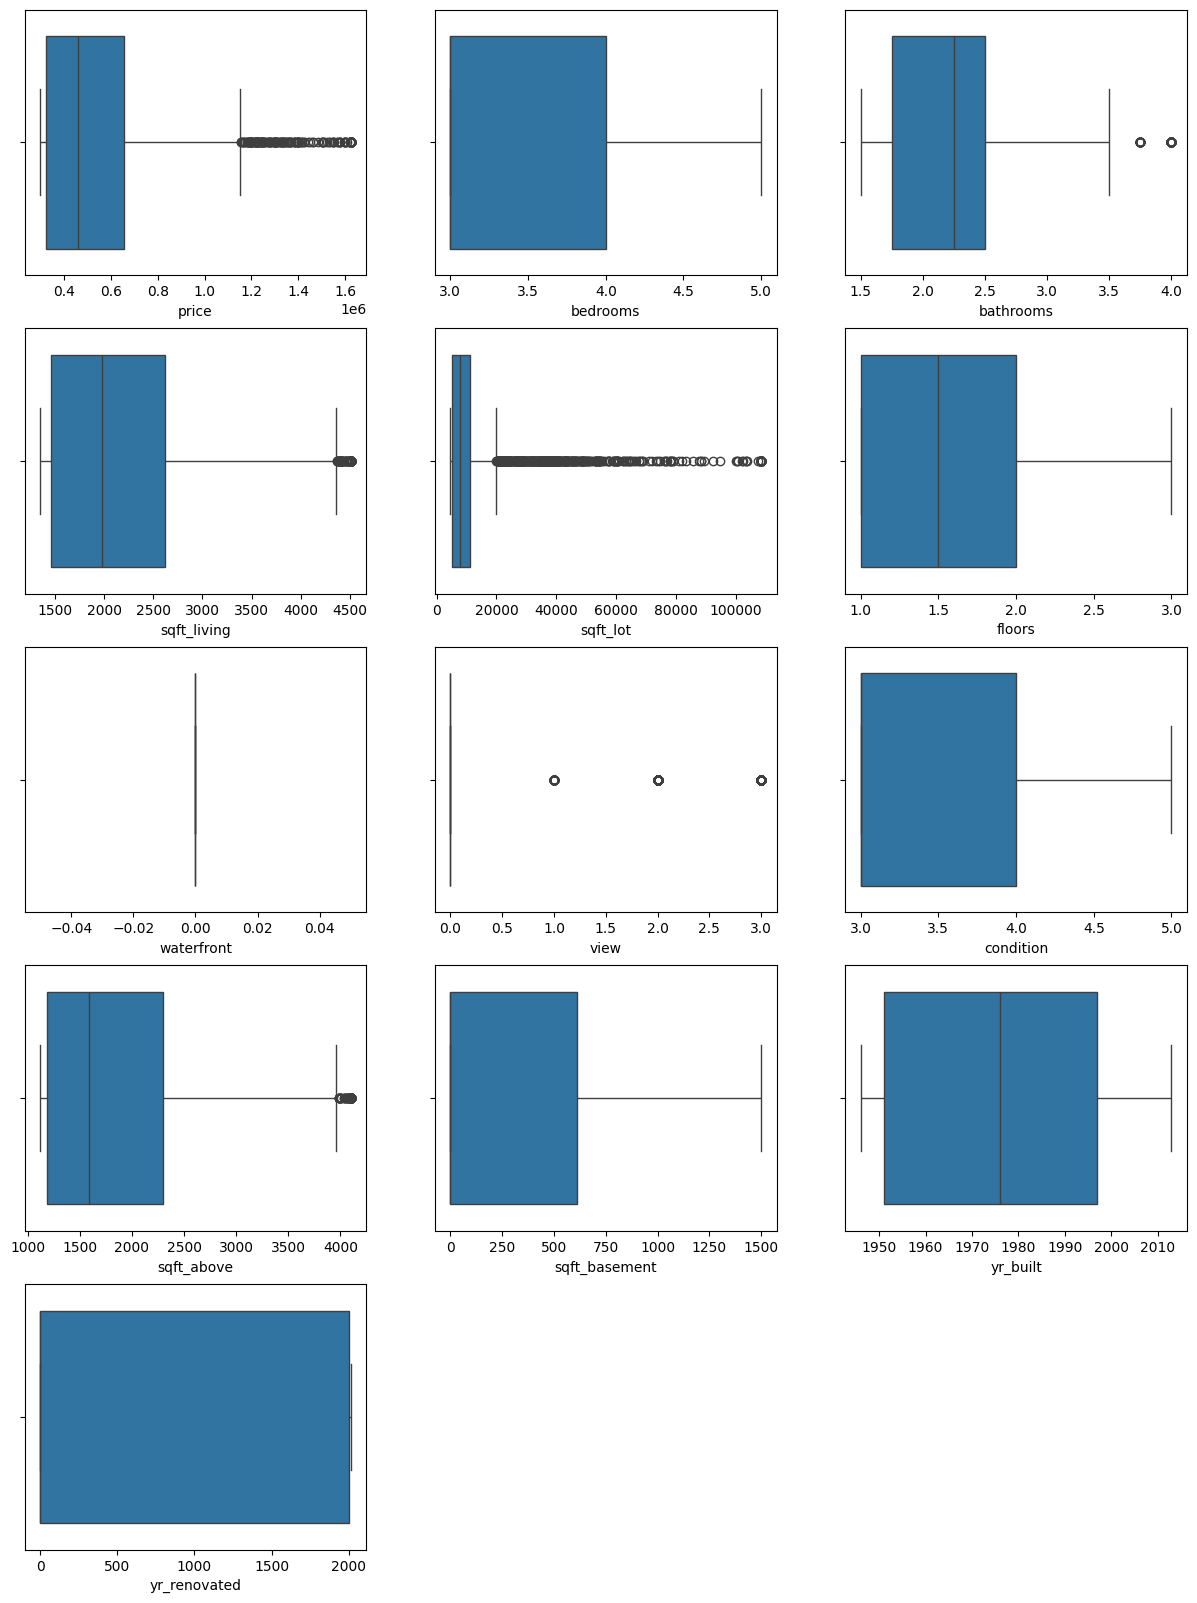

In [105]:
# Analizamos de nuevo la distribucion de cada variable
i=1
plp.figure(figsize=(15,20))
for j in num_var:
    plp.subplot(5,3,i)
    sns.boxplot(data=house_data1,x=j)
    i+=1

Al eliminar los outliner, vemos que la gráfica dedistribución de las variables es distinta, y para algunas como la variale price, ahora si podemos ver en que escala se distribuye.

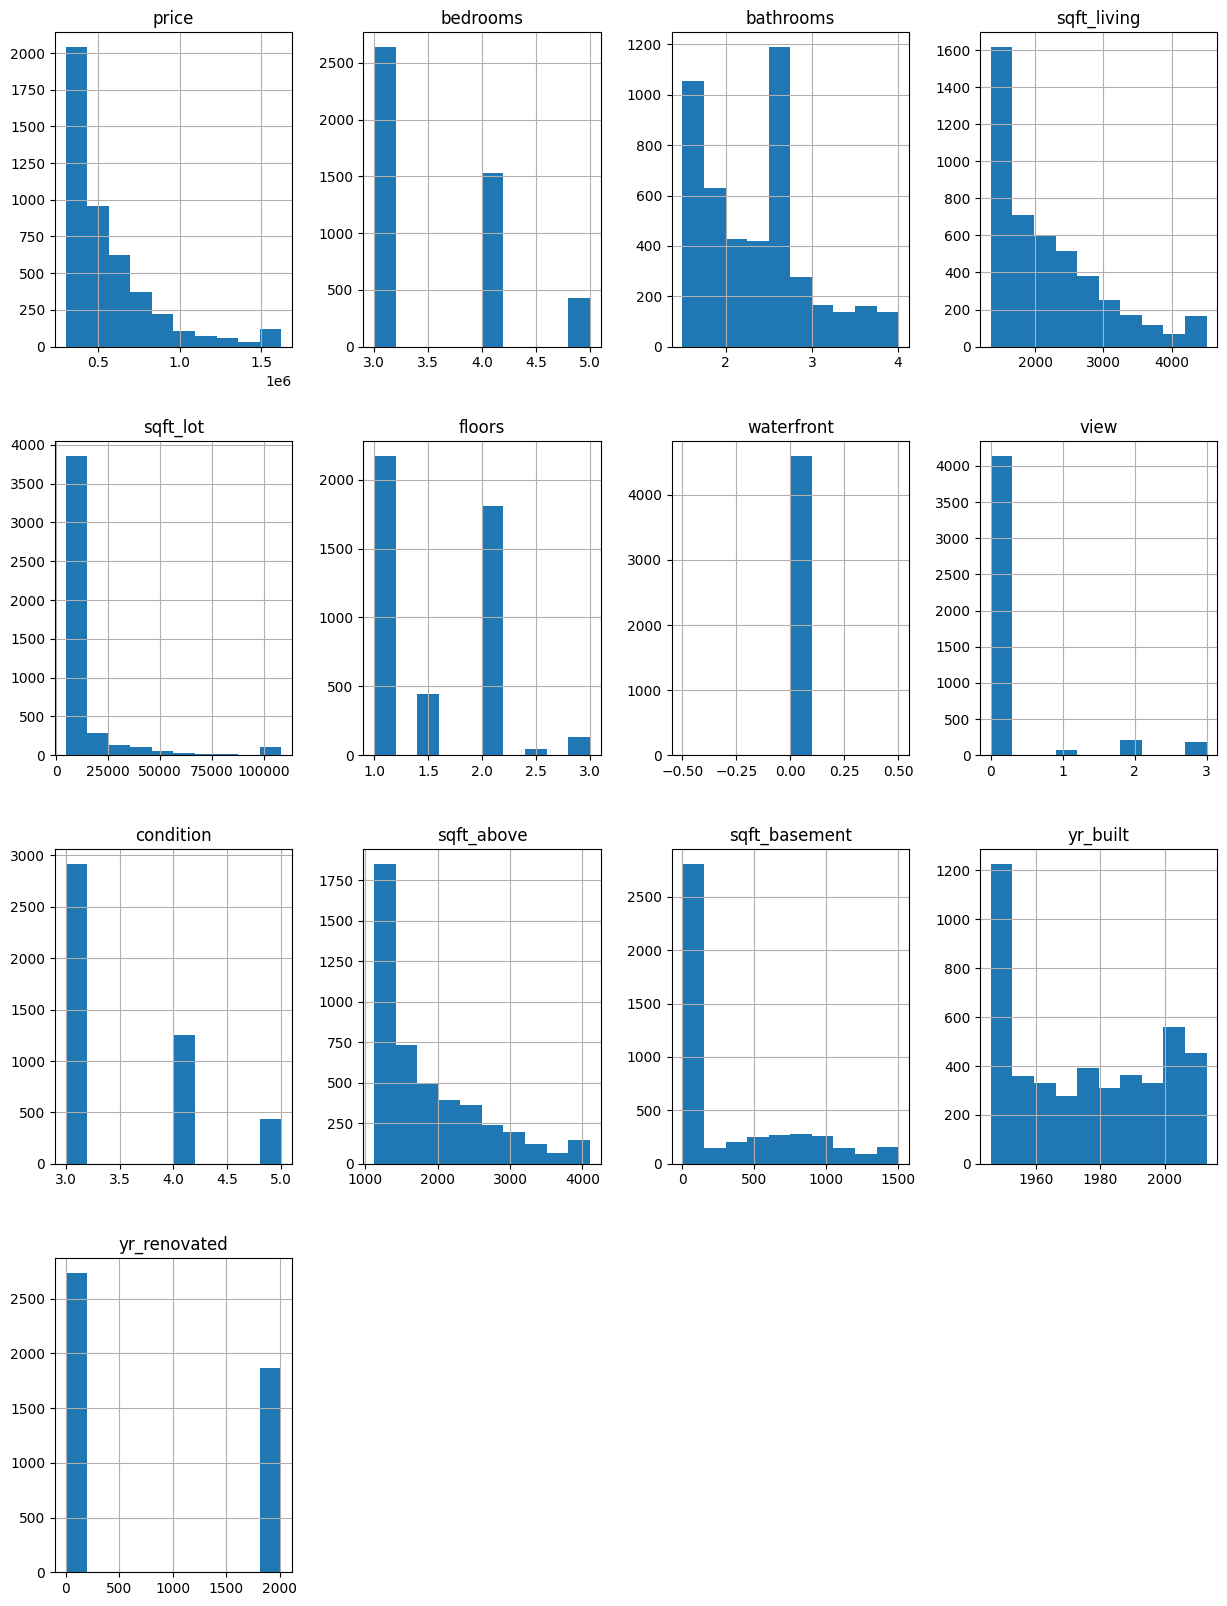

In [106]:
# Visualizacion histogramas
house_data1.hist(figsize=(15,20))
plp.show()

Lo mismo ocurre con la visualización en diagrama de barras, que al eliminar los outliner observamos que las gráficas difieren respecto a la primera visualización.



In [107]:
# En el histograma vemos que la variabla waterprof tiene siempre el mismo valor, por lo que la eliminamos del dataset
house_data1=house_data1.drop(columns='waterfront')

In [108]:
# Vamos a analizar los diferentes valores de las variables categóricas
house_data1[cat_var].nunique()

date          70
street      4525
city          44
statezip      77
country        1
dtype: int64

In [109]:
# La variable country siempre toma el mismo valor, miesntras que la variables street no tiene muchas ocurrencias. Tomamos la decisión de quedarnos solo la variable city.
house_data1.drop(columns=['street','statezip','country'],inplace=True)

#### Analizamos la correlación de variables

<ipython-input-110-1eb88add56df>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = house_data1.corr()


<Axes: >

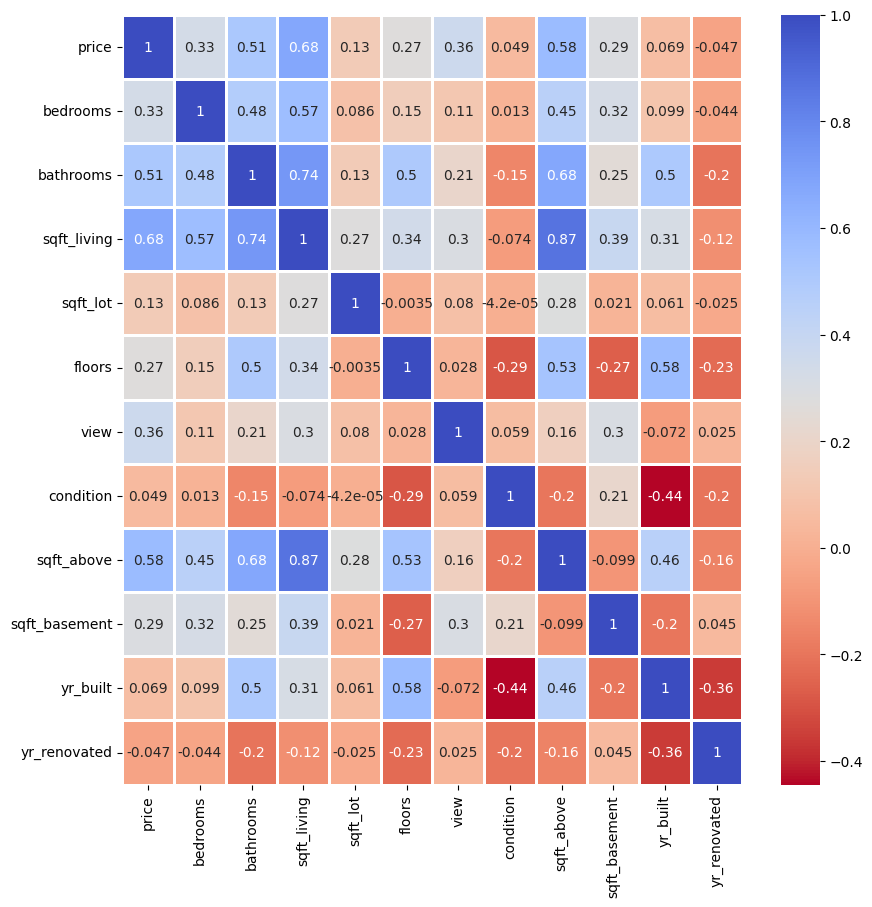

In [110]:
# estudio correlacion de variables
corr = house_data1.corr()
plp.figure(figsize=(10,10))
sns.heatmap(corr,linewidths=1,cmap='coolwarm_r',annot=True)

En este mapa de calor, podemos analizar la correlación entre variables. Por ejemplo, vemos que la variable sqft_above y sqft_living están fuertemete correladas.

In [111]:
# Como nuestra variable objetivo es el precio, vamos a ordenar la correlación de variables, respecto el precio
corr=house_data1.corr()["price"].sort_values(ascending=False)

<ipython-input-111-7d3120346dfb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=house_data1.corr()["price"].sort_values(ascending=False)


<Axes: >

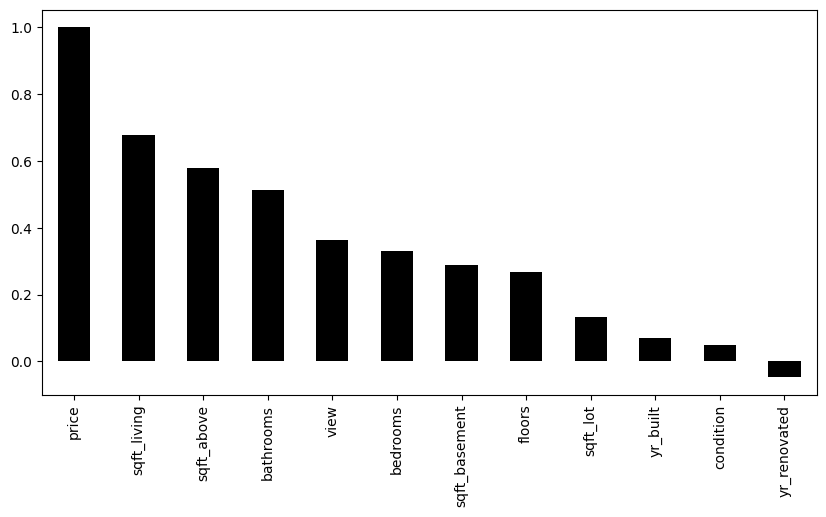

In [112]:
# Visualizamos la relacion de las variables numércias, con la variable precio
plp.figure(figsize=(10,5))
corr.plot(kind='bar',color='black')

<Axes: xlabel='price', ylabel='city'>

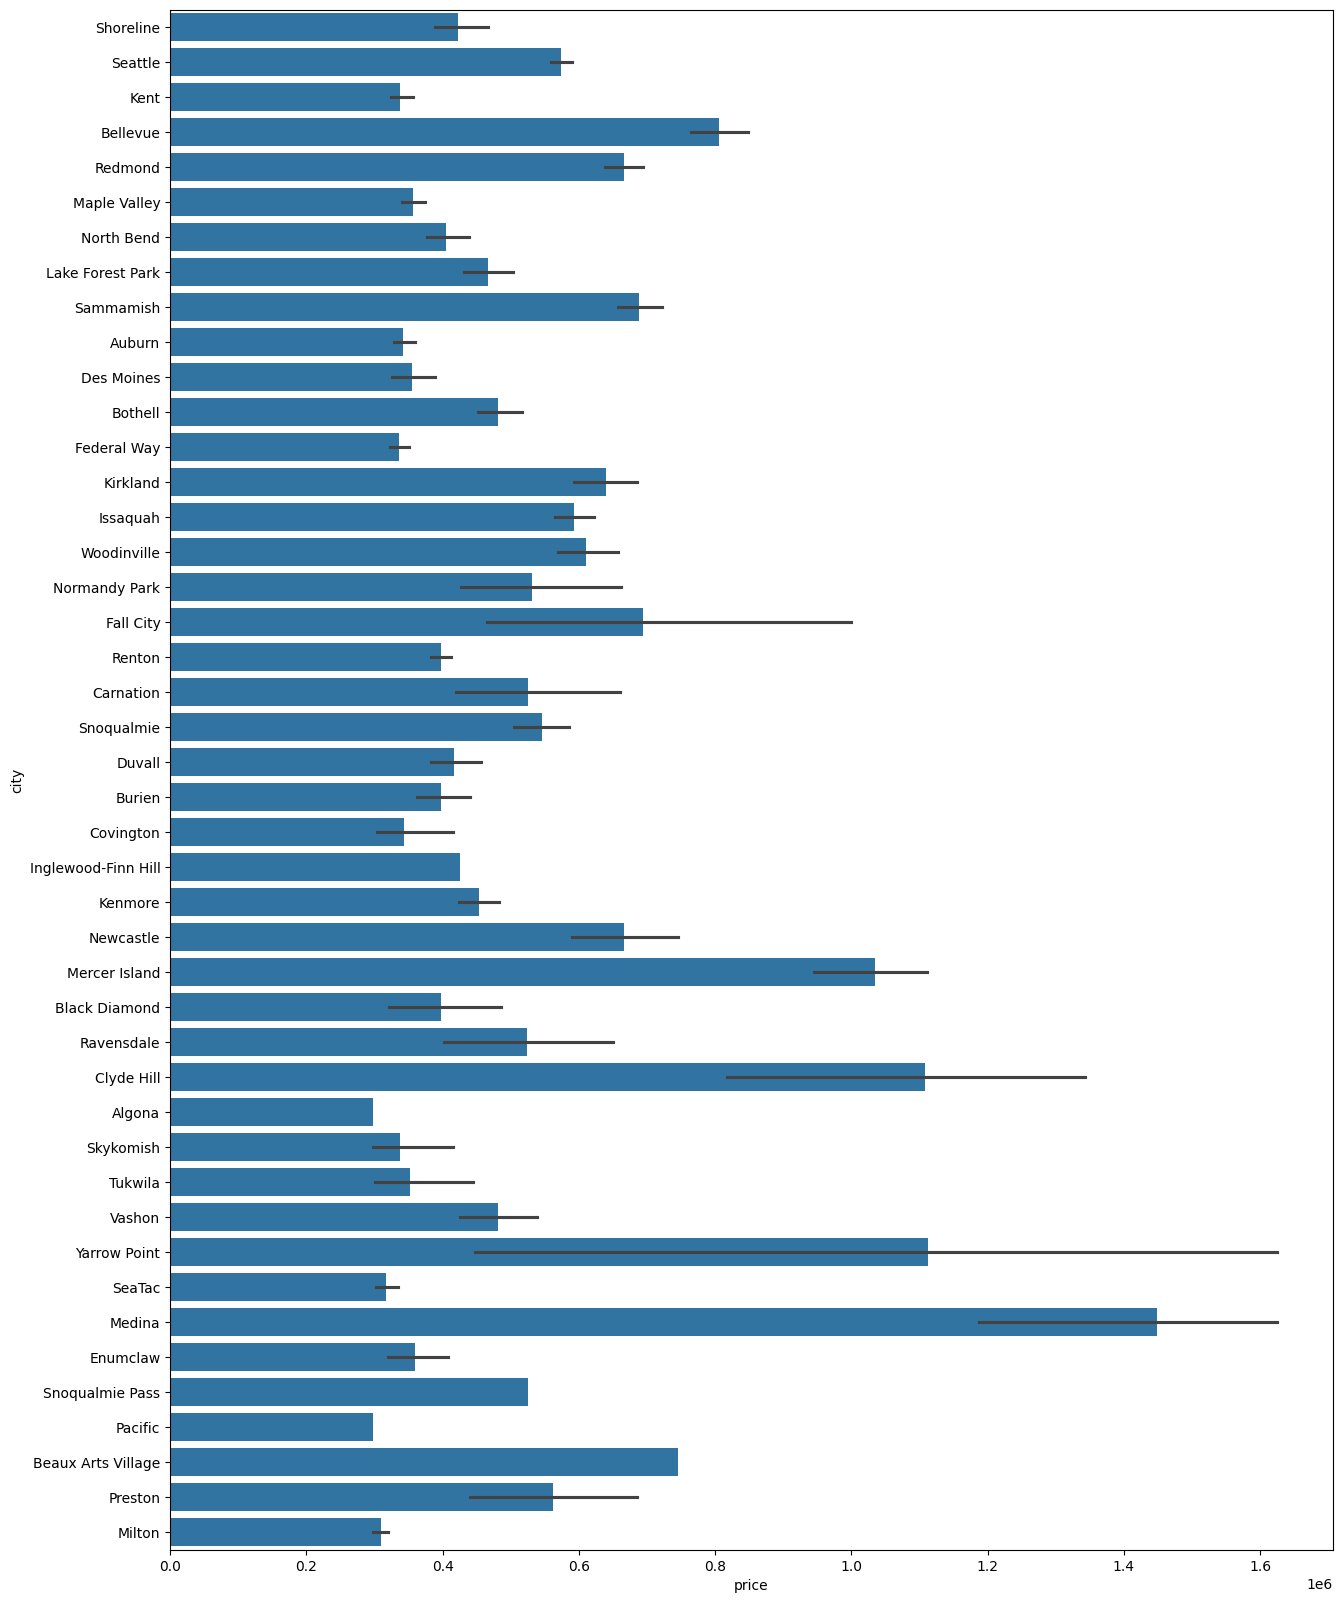

In [113]:
# Vamos a visualizar la relacion de las variable categórica city, con la variable precio
plp.figure(figsize=(15,20))
sns.barplot(data=house_data1,y='city',x='price',orient="h3")

# FASE 3: ENTRENAMIENTO Y VALIDACIÓN

Durante esta fase vamos a entrenar diferentes modelos para predecir la variable PRICE. Para ello plantearemos diferentes escenarios de preprocesamiento, y analizaremos que modelo obtiene mejores resultados

La fase de validación la analizaremos con el error cuadrático medio (MSE). El MSE mide la cantidad de error que hay entre dos conjuntos de datos. En otras palabras, compara un valor predicho y un valor observado o conocido.


# HIPÓTESIS 1

**HIPÓTESIS 1:** Utilizar solo las variables numéricas. Estas son todas las variables:
- Price
- Bedrooms
- Bathrooms
- SQFT Living
- SQFT Lot
- Floors
- Waterfront
- View
- Condition
- SQFT Above
- SQFT Basement
- Year Built
- Year Renovated


FASE DE ENTRENAMIENTO

In [115]:
# Preparamos la hipótesis 1
categorical_columns = ['date','street','city','statezip','country']
data_hipot1 = data.drop(categorical_columns, axis=1)

In [116]:
 # comprobamos como en esta copia del dataset únicamente tenemos las variables numéricas
data_hipot1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992


In [117]:
# indicar variable dependiente y independientes
X_hipot1= data_hipot1.drop('price', axis=1) #variables independientes(todo el dataset menos nuestra variable objetivo)
y_hipot1= data_hipot1['price'] #variable dependiente(objetivo)

In [118]:
# ahora preparamos train data y test data
from sklearn.model_selection import train_test_split
X_hipot1_train, X_hipot1_test, y_hipot1_train, y_hipot1_test = train_test_split(X_hipot1, y_hipot1, test_size=0.20, random_state=43)

In [119]:
 # Entrenar modelo regresion lineal
from sklearn.linear_model import LinearRegression
regresion_lineal = LinearRegression()
regresion_lineal.fit(X_hipot1_train, y_hipot1_train)

LinearRegression()

FASE DE VALIDACIÓN

In [120]:
 # importamos el cálculo del error cuadrático medio (MSE)
from sklearn.metrics import mean_squared_error

In [121]:
# predecimos los valores Y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(X_hipot1_train)

# calculamos el Error Cuadrático Medio (MSE)
mse_hipot1_train = mean_squared_error(y_true = y_hipot1_train, y_pred = prediccion_entrenamiento)
print('Error Cuadrático Medio (MSE) Train = ' + str(mse_hipot1_train))

# predecimos los valores Y para los datos usados en el test
prediccion_entrenamiento = regresion_lineal.predict(X_hipot1_test)

# calculamos el Error Cuadrático Medio (MSE)
mse_hipot1_test = mean_squared_error(y_true = y_hipot1_test, y_pred = prediccion_entrenamiento)
print('Error Cuadrático Medio (MSE) Test = ' + str(mse_hipot1_test))

Error Cuadrático Medio (MSE) Train = 292440342188.26685
Error Cuadrático Medio (MSE) Test = 74834240426.81783


Las **métricas** obtenidas en esta primera hipótesis no son buenas. El Error Cuadrático Medio esta muy lejos de ser un buen resultado. Debemos plantear una nueva hipótesis.

# HIPÓTESIS 2

**HIPÓTESIS 2:** Transformar las variables categóricas en variables numéricas. Para poder realizar esta hipótesis utilizaremos la técnica one_hot_encoding que permite transformar en un conjunto de 1 y 0 una variable categórica.


In [122]:
# preparamos el dataset para la hipótesis 2
# tratamos las variables categoricas con one_hot_encoding
categorical_columns_2 = ['date','street', 'city', 'statezip','country']

In [123]:
# eliminamos la variable date del dataset de la hipótesis 2
data_hipot2 = data.drop(categorical_columns_2, axis=1)

In [124]:
# preparar el dataset para la hipótesis 2
data_hipot2 = pd.get_dummies(data = data, prefix= 'OHE', prefix_sep = '_',
                                       columns = categorical_columns_2,
                                       drop_first = True,
                                       dtype='int8')

In [125]:
# comprobamos que se han realizado los cambios correctamente
data_hipot2.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,OHE_WA 98155,OHE_WA 98166,OHE_WA 98168,OHE_WA 98177,OHE_WA 98178,OHE_WA 98188,OHE_WA 98198,OHE_WA 98199,OHE_WA 98288,OHE_WA 98354
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,...,0,0,0,0,0,0,0,0,0,0
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,...,0,0,0,0,0,0,0,0,0,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,...,0,0,0,0,0,0,0,0,0,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,...,0,0,0,0,0,0,0,0,0,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,...,0,0,0,0,0,0,0,0,0,0


In [126]:
# indicar variable dependiente y independientes
X_hipot2= data_hipot2.drop('price', axis=1) #variables independientes(todo el dataset menos nuestra variable objetivo)
y_hipot2= data_hipot2['price'] #variable dependiente(objetivo)

In [127]:
# ahora preparamos train data y test data
from sklearn.model_selection import train_test_split
X_hipot2_train, X_hipot2_test, y_hipot2_train, y_hipot2_test = train_test_split(X_hipot2, y_hipot2, test_size=0.20, random_state=43)

In [128]:
# Entrenar modelo regresion lineal
from sklearn.linear_model import LinearRegression
regresion_lineal = LinearRegression()
regresion_lineal.fit(X_hipot2_train,  y_hipot2_train)

LinearRegression()

FASE DE VALIDACION

In [129]:
# predecimos los valores Y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(X_hipot2_train)

# calculamos el Error Cuadrático Medio (MSE)
mse_hipot2_train = mean_squared_error(y_true = y_hipot2_train, y_pred = prediccion_entrenamiento)
print('Error Cuadrático Medio (MSE) HIPO 1 Train = ' + str(mse_hipot1_train))
print('Error Cuadrático Medio (MSE) HIPO 2 Train = ' + str(mse_hipot2_train))

# predecimos los valores Y para los datos usados en el test
prediccion_entrenamiento = regresion_lineal.predict(X_hipot2_test)

# calculamos el Error Cuadrático Medio (MSE)
mse_hipot2_test = mean_squared_error(y_true = y_hipot2_test, y_pred = prediccion_entrenamiento)
print('Error Cuadrático Medio (MSE) HIPO 1 Test = ' + str(mse_hipot1_test))
print('Error Cuadrático Medio (MSE) HIPO 2 Test = ' + str(mse_hipot2_test))

Error Cuadrático Medio (MSE) HIPO 1 Train = 292440342188.26685
Error Cuadrático Medio (MSE) HIPO 2 Train = 8.840345971704127e-10
Error Cuadrático Medio (MSE) HIPO 1 Test = 74834240426.81783
Error Cuadrático Medio (MSE) HIPO 2 Test = 286047211698.9898


Seguimos obteniendo unos resultados no optimos.

Hemos obtenido buenos resultados en el Train Set pero unos resultados incluso peores en el Test Set.

# HIPÓTESIS 3

**HIPÓTESIS 3**: Normalización de variable objetivo. Utilizaremos ScikitLearn para normalizar con los distintos Scaler.

In [130]:
# preparamos el dataset para la hipótesis 3
categorical_columns_3 = ['date','street', 'city', 'statezip','country']
data_hipot3 = data.drop(categorical_columns_3, axis=1)

In [131]:
# indicar variable dependiente y independientes
X_hipot3= data_hipot3.drop('price', axis=1) #variables independientes(todo el dataset menos nuestra variable objetivo)
y_hipot3= data_hipot3['price'] #variable dependiente(objetivo)

In [132]:
# escalamos la variable charges para hacerla más estandar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

y_hipot3 = scaler.fit_transform(y_hipot3.to_numpy().reshape(-1,1))
y_hipot3 = y_hipot3.reshape(1,-1)[0]

In [133]:
# ahora preparamos train data y test data
X_hipot3_train, X_hipot3_test, y_hipot3_train, y_hipot3_test = train_test_split(X_hipot3, y_hipot3, test_size=0.20, random_state=43)

In [134]:
# Entrenar modelo regresion lineal
from sklearn.linear_model import LinearRegression
regresion_lineal = LinearRegression()
regresion_lineal.fit(X_hipot3_train,  y_hipot3_train)

LinearRegression()

FASE DE VALIDACION

In [135]:
# predecimos los valores Y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(X_hipot3_train)

# calculamos el Error Cuadrático Medio (MSE)
mse_hipot3_train = mean_squared_error(y_true = y_hipot3_train, y_pred = prediccion_entrenamiento)
print('Error Cuadrático Medio (MSE) HIPO 1 Train = ' + str(mse_hipot1_train))
print('Error Cuadrático Medio (MSE) HIPO 2 Train = ' + str(mse_hipot2_train))
print('Error Cuadrático Medio (MSE) HIPO 3 Train = ' + str(mse_hipot3_train))

# predecimos los valores Y para los datos usados en el test
prediccion_entrenamiento = regresion_lineal.predict(X_hipot3_test)

# calculamos el Error Cuadrático Medio (MSE)
mse_hipot3_test = mean_squared_error(y_true = y_hipot3_test, y_pred = prediccion_entrenamiento)
print('Error Cuadrático Medio (MSE) HIPO 1 Test = ' + str(mse_hipot1_test))
print('Error Cuadrático Medio (MSE) HIPO 2 Test = ' + str(mse_hipot2_test))
print('Error Cuadrático Medio (MSE) HIPO 3 Test = ' + str(mse_hipot3_test))

Error Cuadrático Medio (MSE) HIPO 1 Train = 292440342188.26685
Error Cuadrático Medio (MSE) HIPO 2 Train = 8.840345971704127e-10
Error Cuadrático Medio (MSE) HIPO 3 Train = 0.9200853196909848
Error Cuadrático Medio (MSE) HIPO 1 Test = 74834240426.81783
Error Cuadrático Medio (MSE) HIPO 2 Test = 286047211698.9898
Error Cuadrático Medio (MSE) HIPO 3 Test = 0.23544592210411705


Ahora hemos obtenido unos resultados mucho más precisos que en las otras hipótesis. Unos resultados **óptimos** son aquellos donde el Error Cuadrático Medio es inferior a 1. En este caso, tanto el Train como el Test set se encuentran dentro de estos parámetros.

Por lo tanto, utilizar la hipótesis de normalizar la variable objetivo da mejor rendimiento que las otras hipótesis.


# HIPÓTESIS 4

**HIPÓTESIS 4**: Normalización de variable objetivo. Utilizaremos ScikitLearn para normalizar con MinMaxScaler.

In [136]:
# preparamos el dataset para la hipótesis 4
categorical_columns_4 = ['date','street', 'city', 'statezip','country']
data_hipot4 = data.drop(categorical_columns_4, axis=1)

In [137]:
# indicar variable dependiente y independientes
X_hipot4= data_hipot4.drop('price', axis=1) #variables independientes(todo el dataset menos nuestra variable objetivo)
y_hipot4= data_hipot4['price'] #variable dependiente(objetivo)

In [138]:
# escalamos la variable charges para hacerla más estandar
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

y_hipot4 = scaler.fit_transform(y_hipot4.to_numpy().reshape(-1,1))
y_hipot4 = y_hipot4.reshape(1,-1)[0]

In [139]:
# ahora preparamos train data y test data
X_hipot4_train, X_hipot4_test, y_hipot4_train, y_hipot4_test = train_test_split(X_hipot4, y_hipot4, test_size=0.20, random_state=43)

In [140]:
# Entrenar modelo regresion lineal
from sklearn.linear_model import LinearRegression
regresion_lineal = LinearRegression()
regresion_lineal.fit(X_hipot4_train,  y_hipot4_train)

LinearRegression()

FASE DE VALIDACION

In [141]:
# predecimos los valores Y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(X_hipot4_train)

# calculamos el Error Cuadrático Medio (MSE)
mse_hipot4_train = mean_squared_error(y_true = y_hipot4_train, y_pred = prediccion_entrenamiento)
print('Error Cuadrático Medio (MSE) HIPO 1 Train = ' + str(mse_hipot1_train))
print('Error Cuadrático Medio (MSE) HIPO 2 Train = ' + str(mse_hipot2_train))
print('Error Cuadrático Medio (MSE) HIPO 3 Train = ' + str(mse_hipot3_train))
print('Error Cuadrático Medio (MSE) HIPO 4 Train = ' + str(mse_hipot4_train))

# predecimos los valores Y para los datos usados en el test
prediccion_entrenamiento = regresion_lineal.predict(X_hipot4_test)

# calculamos el Error Cuadrático Medio (MSE)
mse_hipot4_test = mean_squared_error(y_true = y_hipot4_test, y_pred = prediccion_entrenamiento)
print('Error Cuadrático Medio (MSE) HIPO 1 Test = ' + str(mse_hipot1_test))
print('Error Cuadrático Medio (MSE) HIPO 2 Test = ' + str(mse_hipot2_test))
print('Error Cuadrático Medio (MSE) HIPO 3 Test = ' + str(mse_hipot3_test))
print('Error Cuadrático Medio (MSE) HIPO 4 Test = ' + str(mse_hipot4_test))

Error Cuadrático Medio (MSE) HIPO 1 Train = 292440342188.26685
Error Cuadrático Medio (MSE) HIPO 2 Train = 8.840345971704127e-10
Error Cuadrático Medio (MSE) HIPO 3 Train = 0.9200853196909848
Error Cuadrático Medio (MSE) HIPO 4 Train = 0.00041361912233511914
Error Cuadrático Medio (MSE) HIPO 1 Test = 74834240426.81783
Error Cuadrático Medio (MSE) HIPO 2 Test = 286047211698.9898
Error Cuadrático Medio (MSE) HIPO 3 Test = 0.23544592210411705
Error Cuadrático Medio (MSE) HIPO 4 Test = 0.00010584337514567075


Esta nueva hipótesis, utilizando un método de Scaler distinto nos da unos resultados incluso mejores que en la hipótesis anterior.

### FASE 4. Evaluación e interpretación de los resultados

Error Cuadrático Medio (MSE) HIPO 1 Train = 292440342188.26685
Error Cuadrático Medio (MSE) HIPO 2 Train = 8.840345971704127e-10
Error Cuadrático Medio (MSE) HIPO 3 Train = 0.9200853196909848
Error Cuadrático Medio (MSE) HIPO 4 Train = 0.00041361912233511914
Error Cuadrático Medio (MSE) HIPO 1 Test = 74834240426.81783
Error Cuadrático Medio (MSE) HIPO 2 Test = 286047211698.9898
Error Cuadrático Medio (MSE) HIPO 3 Test = 0.23544592210411705
Error Cuadrático Medio (MSE) HIPO 4 Test = 0.00010584337514567075

Vemos que en la **cuarta hipótesis** el error cuadrático medio es muy cercano al 0, lo que nos indica que este es el mejor modelo.